<a href="https://colab.research.google.com/github/Deathwish447/1fichier-dl/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REALISTIC SCENE GENERATION FROM STANDALONE OBJECTS 

---








In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Dependencies**

---



In [ ]:
!pip install tensorflow==2.3.0
!pip3 install pixellib
!pip3 install pixellib --upgrade

**Background Creation**

---



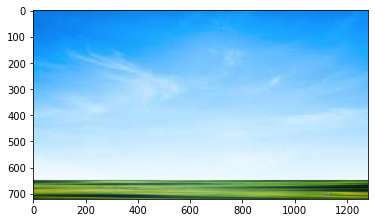

In [60]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2  
# from IPython.display as display
# opening up of images
down = Image.open("/content/gdrive/MyDrive/Project/Merge/land.jpeg")
up = Image.open("/content/gdrive/MyDrive/Project/Merge/sky.jpeg")
down.size
up.size
ratio=0.9
upr = int(ratio*720)
dor = 720-upr
down_size = down.resize((1280, dor))
up_size = up.resize((1280, upr))
  
# creating a new image and pasting 
# the images
img2 = Image.new("RGB", (1280, 720), "white")
  
# pasting the first image (image_name,
# (position))
img2.paste(up_size, (0, 0))
  
# pasting the second image (image_name,
# (position))
img2.paste(down_size, (0, upr))
  
plt.imshow(img2)
img2 = img2.save("/content/gdrive/MyDrive/Project/Merge/Output/Output.jpg")

# cv2.imwrite('output.jpg',img2)

In [ ]:
import pixellib
from pixellib.tune_bg import alter_bg

**Standalone Object Separation**

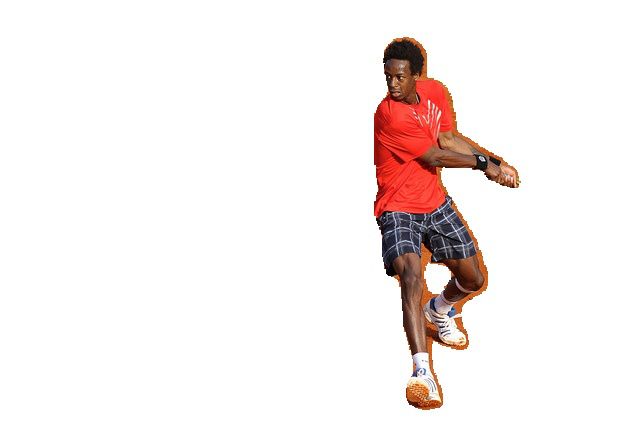

In [61]:
change_bg = alter_bg()
change_bg.load_pascalvoc_model("/content/gdrive/MyDrive/Project/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
change_bg.color_bg("/content/gdrive/MyDrive/Project/Input/123.jpg", colors = (255,255,255), output_image_name="/content/gdrive/MyDrive/Project/Output/colored_bg.jpg")
display(Image.open("/content/gdrive/MyDrive/Project/Output/colored_bg.jpg"))

**Resizing the image**

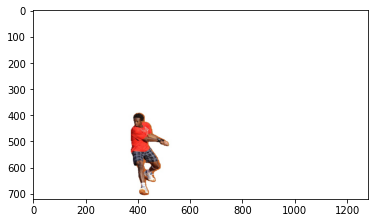

In [65]:
testimg = Image.new("RGB", (1280, 720), "white")
inp = Image.open("/content/gdrive/MyDrive/Project/Output/colored_bg.jpg")
inp_size = inp.resize((640, 360))
testimg.paste(inp_size, (0, 360))
plt.imshow(testimg)


In [66]:
testimg = testimg.save("/content/gdrive/MyDrive/Project/Input/Output.jpg")


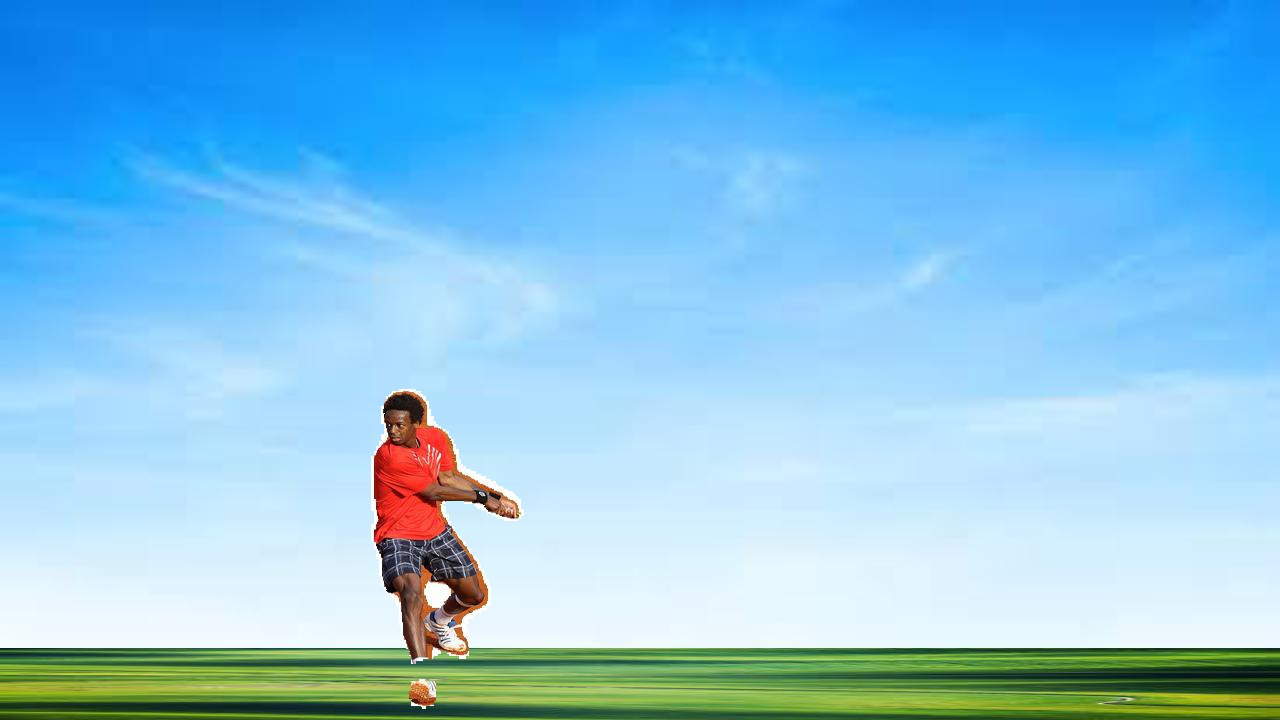

In [68]:
change_bg = alter_bg()
change_bg.load_pascalvoc_model("/content/gdrive/MyDrive/Project/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
output = change_bg.change_bg_img(f_image_path = "/content/gdrive/MyDrive/Project/Input/Output.jpg",b_image_path = "/content/gdrive/MyDrive/Project/Merge/Output/Output.jpg")
cv2.imwrite("/content/gdrive/MyDrive/Project/Merge/Output/img.jpg", output)
display(Image.open("/content/gdrive/MyDrive/Project/Merge/Output/img.jpg"))

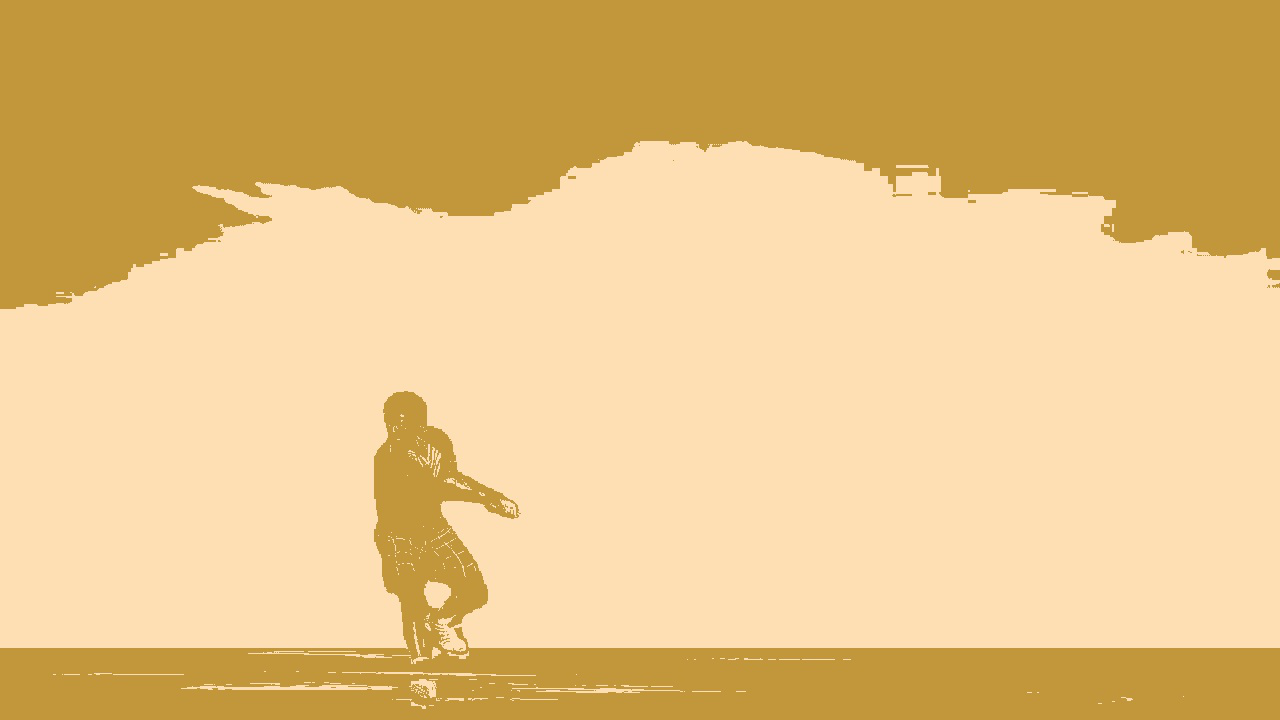

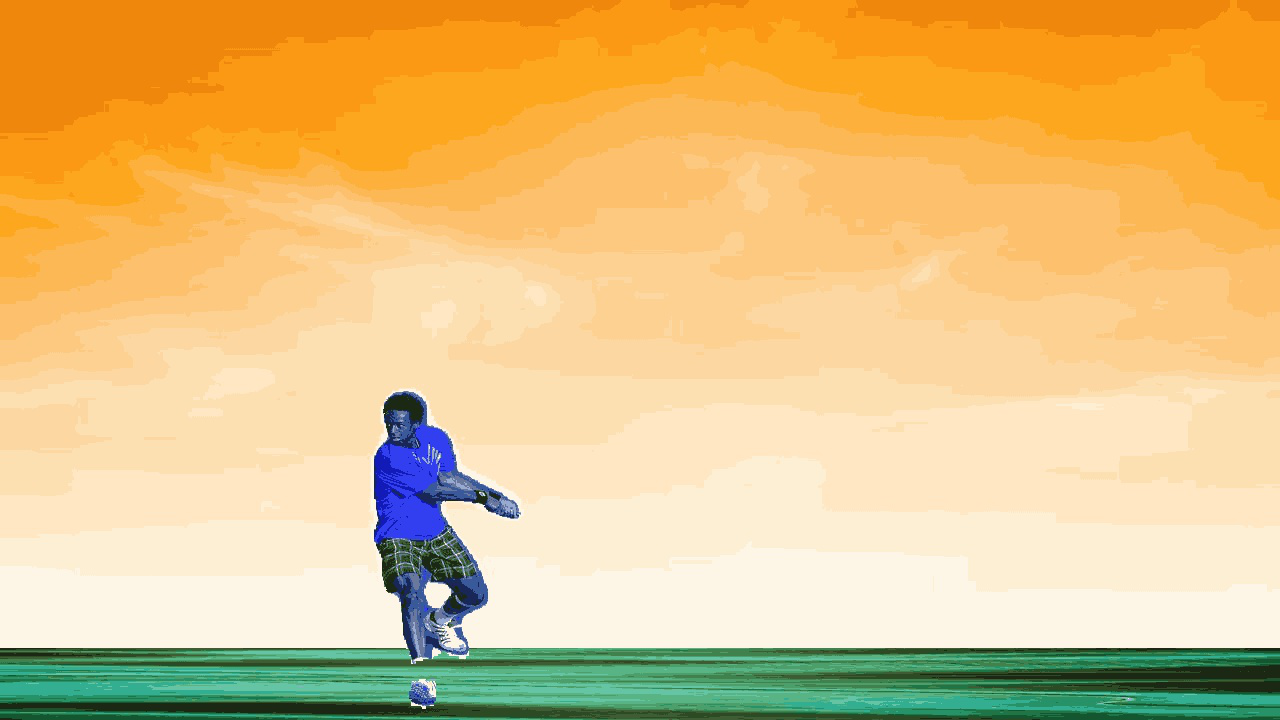

In [77]:
import matplotlib as plt
import numpy as np
import cv2
path = '/content/gdrive/MyDrive/Project/Merge/Output/img.jpg'
img = cv2.imread(path)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)


K=2
ttempts=10

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

cv2.imwrite("/content/gdrive/MyDrive/Project/Merge/Output/reimg.jpg", result_image)
display(Image.open("/content/gdrive/MyDrive/Project/Merge/Output/reimg.jpg"))

K=30
ttempts=10

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

cv2.imwrite("/content/gdrive/MyDrive/Project/Merge/Output/reimg.jpg", result_image)
display(Image.open("/content/gdrive/MyDrive/Project/Merge/Output/reimg.jpg"))


# cv2.imshow("Segementation",result_image)